 # Unsupervised machine learning

## Import dataset and explore data

We want to clusterize music from Spotify dataset from Kaggle https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db
On this dataset we have musics and 18 features on them: 
- genre, 
- artist_name, 
- track_name, 
- track_id, 
- popularity, 
- acousticness, 
- danceability, 
- duration_ms, 
- energy, 
- instrumantality, 
- key, 
- liveness, 
- loudness, 
- mode, 
- speechiness, 
- tempo, 
- time_signature
- valence (the positivity)

We want to group musics so that the user who listen on a music will probably like music from the same group.

First we will analyse data, to have the good format, remove useless column and null values and than transform qualitative data to numerical values.

In [82]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
full_musics = pd.read_csv('SpotifyFeatures.csv')
full_musics.head() 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [61]:
musics = full_musics

In [62]:
len(musics)

232725

In [63]:
musics.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Clean the dataset :
- remove categorial data we cannot use
- encode categorial data usefull for our study
- Use dummies for other categorial data
- Proceed null values

In [64]:
#Drop columns
musics = musics.drop(columns=['artist_name', 'track_name', 'track_id'])

In [65]:
#Change mode value Major: 0, minor: 1
musics['mode'].value_counts()

Major    151744
Minor     80981
Name: mode, dtype: int64

In [67]:
musics['mode'] = LabelEncoder().fit_transform(musics['mode'])

In [68]:
#Change genre value to have numerical value 
musics['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [69]:
#Transform genre, key and time_signature to dummies
musics = pd.get_dummies(musics, drop_first=True, dtype=float)

In [70]:
musics.dtypes

popularity                  int64
acousticness              float64
danceability              float64
duration_ms                 int64
energy                    float64
instrumentalness          float64
liveness                  float64
loudness                  float64
mode                        int64
speechiness               float64
tempo                     float64
valence                   float64
genre_Alternative         float64
genre_Anime               float64
genre_Blues               float64
genre_Children's Music    float64
genre_Children’s Music    float64
genre_Classical           float64
genre_Comedy              float64
genre_Country             float64
genre_Dance               float64
genre_Electronic          float64
genre_Folk                float64
genre_Hip-Hop             float64
genre_Indie               float64
genre_Jazz                float64
genre_Movie               float64
genre_Opera               float64
genre_Pop                 float64
genre_R&B     

In [71]:
musics.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


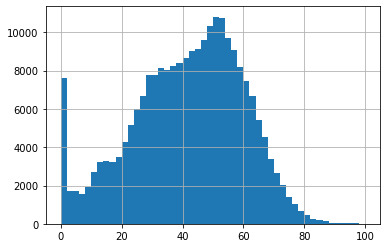

In [72]:
musics["popularity"].hist(bins=50)

In [32]:
# Do we have missing values?
musics.isnull().sum()

popularity                0
acousticness              0
danceability              0
duration_ms               0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
mode                      0
speechiness               0
tempo                     0
valence                   0
genre_Alternative         0
genre_Anime               0
genre_Blues               0
genre_Children's Music    0
genre_Children’s Music    0
genre_Classical           0
genre_Comedy              0
genre_Country             0
genre_Dance               0
genre_Electronic          0
genre_Folk                0
genre_Hip-Hop             0
genre_Indie               0
genre_Jazz                0
genre_Movie               0
genre_Opera               0
genre_Pop                 0
genre_R&B                 0
genre_Rap                 0
genre_Reggae              0
genre_Reggaeton           0
genre_Rock                0
genre_Ska                 0
genre_Soul          

## Data Clustering with K-Means

We will cluster the data with K-Means first. 
The labels_ attributes will be added to the dataframe as a new column. As we know that we have 27 genre of musics, lets try to have around 30 clusters. Then visualized our clusters by ploting results.

In [74]:
kmeans = KMeans(n_clusters=30, random_state=0).fit(musics)
musics['labels'] = kmeans.labels_

In [75]:
musics.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,labels
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23


In [76]:
musics['labels'].value_counts()

0     26831
27    26024
18    24307
8     23340
10    20001
24    17979
22    15992
6     13093
5     12616
14     9717
28     9415
23     6909
19     6662
13     4658
4      4320
2      3463
17     2605
26     1751
9      1295
15      684
1       414
25      270
11      137
29       96
7        43
12       38
3        27
21       26
20       10
16        2
Name: labels, dtype: int64

Analyze our cluster: Display the 10 first song on each of our clusters and the genre distribution into each cluster

In [78]:
# Fontion which display the 10 closest movie accordingly on the number of cluster you want and the dataframe

def top_k_songs_by_cluster(k, df):
    for i in range(k):
        print("Cluster", i)
        centroid = kmeans.cluster_centers_[i]
        scores = [(index, euclidean(row, centroid)) for index, row in df[df.labels==i].drop("labels", axis=1).iterrows()]
        for song in sorted(scores, key = lambda x: x[1])[:10]:
            print(full_musics.iloc[song[0]]["artist_name"], 
                  "/", 
                  full_musics.iloc[song[0]]["track_name"],
                 "/",
                 full_musics.iloc[song[0]]["genre"])
        print("\n\n")

In [80]:
scaler = StandardScaler()
musics_scaled = scaler.fit_transform(musics.drop("labels", axis=1))
kmeans = KMeans(n_clusters=30, random_state=0, n_jobs=-1).fit(musics_scaled)
musics_scaled = pd.DataFrame(musics_scaled)
musics_scaled['labels'] = kmeans.labels_

In [81]:
top_k_songs_by_cluster(30, musics_scaled)

Cluster 0
Ziggy Marley / I Don't Wanna Live on Mars / Reggae
Buju Banton / Cry No More / Reggae
The Holdup / Spoken For / Reggae
SDIB / Where's That Girl / Reggae
L'Entourloop / Loneliness Is Always Around / Reggae
Bob Marley & The Wailers / Baby We've Got A Date (Rock It Baby) - Original Album Version / Reggae
Quique Neira / Continente / Reggae
Lucky Dube / Good Girl / Reggae
Lucky Dube / Love Me (The Way I Am) / Reggae
Lucky Dube / Teach the World / Reggae



Cluster 1
The Babys / Back on My Feet Again / Rock
The Raconteurs / Sunday Driver / Rock
Bob Seger / Fire Lake / Rock
Brothers Osborne / Pushing Up Daisies (Love Alive) / Rock
Norman Greenbaum / Spirit In The Sky / Rock
Queen / Keep Yourself Alive / Rock
Paul McCartney / Jet - Remastered 2010 / Rock
Local Natives / Dark Days / Rock
Joe Diffie / Prop Me Up Beside The Jukebox (If I Die) / Rock
Meat Puppets / Backwater / Rock



Cluster 2
Masaharu Fukuyama / It's Only Love / Anime
Mikuni Shimokawa / Minami Kaze / Anime
Sheena Ringo

Glad / Christ the Lord is Risen Today / A Capella
MC6 A Cappella / Goodnight Sweetheart / A Capella
The King's Singers / It's Beginning to Look a Lot Like Christmas / A Capella
The Singers Unlimited / Autumn in New York / A Capella
The UNCG Spartones / Something's Missing (A Capella) [Bonus Track] / A Capella
Hans Zimmer / Slice of Pie / Soundtrack
Ilan Eshkeri / Wedding Waltz / Soundtrack
Adam Sandler / What the Hell Happened to Me? / Comedy
Michael Giacchino / Helen of Ploy / Soundtrack
Stephen Lynch / Dear Diary 4 / Comedy



Cluster 20
Jhene Aiko / W.A.Y.S. / R&B
SoMo / Contraband / R&B
Ciara / Promise / R&B
Toni Braxton / Spanish Guitar / R&B
Ro James / Last Cigarette / R&B
August Alsina / Don't Matter / R&B
Jamie Foxx / Do What It Do / R&B
Chris Brown / Drown In It / R&B
August Alsina / Go / R&B
HONNE / Shrink ◐ / R&B



Cluster 21
Local Natives / Dark Days / Pop
Bastille / Pompeii / Pop
Matt Stell / Prayed For You / Pop
Lil Uzi Vert / Do What I Want / Pop
Saint Motel / Cold Cold

In [47]:
musics_scaled['labels'].value_counts()

14    9370
21    9353
9     9345
11    9331
3     9321
1     9233
4     9231
22    9223
5     9204
6     9100
10    9042
17    8991
29    8962
20    8943
27    8938
13    8910
2     8864
16    8846
0     8755
12    8679
7     8640
25    8594
18    8004
26    7598
28    6222
23    5336
8     3280
19    2606
15     666
24     138
Name: labels, dtype: int64

In [83]:
full_musics["labels"] = kmeans.labels_

In [84]:
def genre_by_cluster(k, df):
    fig, axs = plt.subplots(k, 1, figsize=(5, 5*k))
    for i in range(k):
        df[df["labels"] == i]["genre"].value_counts().plot.bar(ax=axs[i])
        axs[i].set_title('Cluster {0}'.format(i))
    fig.tight_layout()
    fig.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


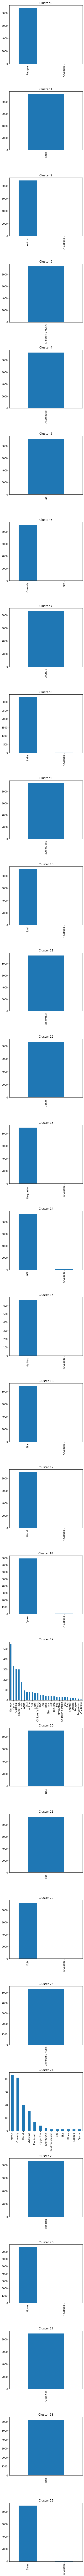

In [85]:
genre_by_cluster(30, full_musics)

Remove the genre and re-clusterize. Again analyze the distribution of the genre on each cluster

In [86]:
scaler = StandardScaler()
cols = [col for col in musics.columns if not (col.startswith("genre") or col.startswith("key"))]
musics_scaled = scaler.fit_transform(musics[cols].drop("labels", axis=1))
kmeans = KMeans(n_clusters=30, random_state=0, n_jobs=-1).fit(musics_scaled)
musics_scaled = pd.DataFrame(musics_scaled)
musics_scaled['labels'] = kmeans.labels_
full_musics["labels"] = kmeans.labels_

In [87]:
top_k_songs_by_cluster(30, musics_scaled)

Cluster 0
Kate Nash / Nicest Thing / Folk
Angus & Julia Stone / Passionfruit (triple j Like A Version) / Folk
Angus & Julia Stone / Passionfruit (triple j Like A Version) / Indie
Electric Light Orchestra / It's Over / Folk
Bmike / I Deserve Better / Hip-Hop
Mura Masa / When U Need Me / Soul
Jhene Aiko / It's Cool / R&B
Jhene Aiko / It's Cool / Alternative
Jess Ray / Did Not Our Hearts Burn / Children’s Music
Samm Henshaw / Better / R&B



Cluster 1
Ramin Djawadi / Meaning of Life / Soundtrack
Michael Giacchino / He's Here For Us / Soundtrack
Hauschka / Skating Through the Woods / Soundtrack
Ramin Djawadi / Rule of Three / Soundtrack
Alan Menken / Beauty And The Beast / Movie
Alan Menken / Beauty And The Beast / Soundtrack
Blake Neely / I Will Wait for You / Soundtrack
Sergei Rachmaninoff / Prelude in G minor, Op.23, No.5 : Alla marcia / Classical
Franz Schubert / Serenade, D. 957, No. 4 / Classical
Jan A.P. Kaczmarek / Parker's Dance Played On Piano / Soundtrack



Cluster 2
Havelin / 

Thousand Foot Krutch / Running With Giants / Alternative
Hey Violet / Unholy / Dance
Hey Violet / Unholy / Indie
Thousand Foot Krutch / Running With Giants / Children’s Music
Allie X / Science / Soul
Vinyl Theatre / New Machines / Indie
Streetlight Manifesto / If and When We Rise Again / Ska
Mariah Carey / All I Want For Christmas Is You / R&B
Keith Urban / Gettin' In The Way / Country
Ace Hood / Body 2 Body / Hip-Hop



Cluster 19
John Heffron / Even More Things / Comedy
Jim Norton / Flirting / Comedy
Shane Mauss / Adam's First Day on Earth / Comedy
Dennis Miller / Terrorists / Comedy
Todd Barry / Preachy Singer, English Washer, Alabama, Pittsburgh / Comedy
Matt Braunger / That's Not the Point / Comedy
Mike Birbiglia / Dammit I'm Eatin' Pretzels / Comedy
Christian Finnegan / If You Don't Have Any 'I.D.'... / Comedy
Myq Kaplan / Television, Doctors, And Snakes / Comedy
Hasan Minhaj / Facebook (Screw You Zimbabwe) / Comedy



Cluster 20
Hagood Hardy / Anne's Theme / Soundtrack
John Will

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


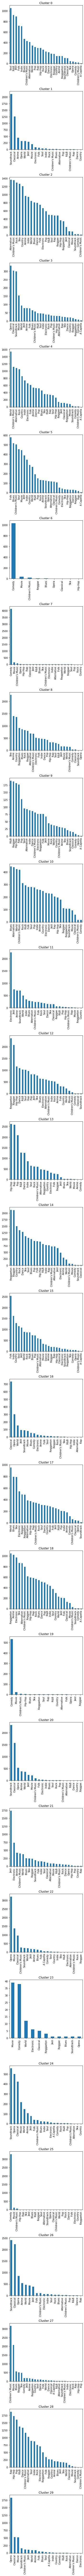

In [88]:
genre_by_cluster(30, full_musics)

## Predict next song

In [121]:
def next_song(ind):
    print(kmeans.predict(scaler.fit_transform(musics[cols].drop(columns=["labels"], axis=1))[ind].reshape(1, -1)))
    #print(full_musics.iloc[ind])
    

In [122]:
full_musics.iloc[10]


genre                                                           Movie
artist_name                                         Leopold Stokowski
track_name          Symphony No.4 In E Minor Op.98 : IV. Allegro E...
track_id                                       0XKgegoxLcIihK3Klpfo3N
popularity                                                          0
acousticness                                                    0.921
danceability                                                    0.191
duration_ms                                                    566960
energy                                                          0.145
instrumentalness                                                0.529
key                                                                 E
liveness                                                        0.141
loudness                                                      -17.239
mode                                                            Minor
speechiness         

In [123]:
next_song(10)

[16]


In [98]:
centroid = kmeans.cluster_centers_[1]
centroid

array([-0.52366405,  1.33757307, -1.41032148, -0.06671319, -1.53070429,
        2.23819869, -0.40331335, -1.84968829,  1.36887627, -0.41647877,
       -0.56558671, -1.21153652, -0.10645828, -0.33996631,  0.39846882,
       -0.15174153])

In [ ]:
scores = [(index, euclidean(row, centroid)) for index, row in df[df.labels==i].drop("labels", axis=1).iterrows()]


In [112]:
musics_scaled.iloc[10].drop('labels')

0    -2.261007
1     1.557189
2    -1.957700
3     2.790060
4    -1.616814
5     1.257396
6    -0.373271
7    -1.278571
8     1.368876
9    -0.439122
10   -1.049929
11   -1.422786
12   -0.106458
13   -0.339966
14    0.399024
15   -0.151742
Name: 10, dtype: float64

In [114]:
full_musics.iloc[10]

genre                                                           Movie
artist_name                                         Leopold Stokowski
track_name          Symphony No.4 In E Minor Op.98 : IV. Allegro E...
track_id                                       0XKgegoxLcIihK3Klpfo3N
popularity                                                          0
acousticness                                                    0.921
danceability                                                    0.191
duration_ms                                                    566960
energy                                                          0.145
instrumentalness                                                0.529
key                                                                 E
liveness                                                        0.141
loudness                                                      -17.239
mode                                                            Minor
speechiness         